In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("All necessary libraries have been imported successfully.")


All necessary libraries have been imported successfully.


In [21]:
print("\n--- Loading Lung Cancer Patient Dataset ---")
try:
    df_raw = pd.read_csv('cancer patient data sets.csv')
    print("Dataset loaded successfully!")
    print(f"The dataset contains {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'cancer patient data sets.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")
    exit()




--- Loading Lung Cancer Patient Dataset ---
Dataset loaded successfully!
The dataset contains 100 rows and 17 columns.


In [22]:
print("\n--- Cleaning and Preprocessing Data ---")
# If df_raw is not defined, try to load the dataset automatically
if 'df_raw' not in globals():
    try:
        df_raw = pd.read_csv('cancer patient data sets.csv')
        print("Dataset loaded automatically in preprocessing cell.")
    except FileNotFoundError:
        raise FileNotFoundError("'cancer patient data sets.csv' not found. Please make sure the dataset file is in the same directory as the notebook.")
# Drop 'index' and 'Patient Id' columns only if they exist
cols_to_drop = [col for col in ['index', 'Patient Id'] if col in df_raw.columns]
if cols_to_drop:
    df = df_raw.drop(cols_to_drop, axis=1)
    print(f"Dropped unnecessary columns: {cols_to_drop}.")
else:
    df = df_raw.copy()
    print("No unnecessary columns to drop.")

# Our target variable, 'Level', is text ('Low', 'Medium', 'High').
# ML models only work with numbers. So, we use LabelEncoder to convert these
# text labels into numbers (e.g., Low -> 0, Medium -> 1, High -> 2).
le = LabelEncoder()
df['Level_encoded'] = le.fit_transform(df['Level'])

print("\nMapping for Target Variable 'Level':")
level_mapping = {index: label for index, label in enumerate(le.classes_)}
print(level_mapping)
print("The 'Level' column has been numerically encoded.")



--- Cleaning and Preprocessing Data ---
No unnecessary columns to drop.

Mapping for Target Variable 'Level':
{0: 'High', 1: 'Low', 2: 'Medium'}
The 'Level' column has been numerically encoded.


In [23]:
# EDA is like being a detective. We explore the data to find patterns,
# relationships, and insights. We'll use various plots to visualize the data.

print("\n--- Starting Exploratory Data Analysis (EDA) ---")
# Setting a consistent and professional style for our plots.
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-poster')



--- Starting Exploratory Data Analysis (EDA) ---


In [24]:
# a) Statistical Summary
# Let's get a high-level statistical overview of our data (count, mean, std, etc.).
print("\nStatistical Summary of the Dataset:")
print(df.describe())


Statistical Summary of the Dataset:
           Gender         Age     Smoking  Yellow fingers     Anxiety  \
count  100.000000  100.000000  100.000000      100.000000  100.000000   
mean     1.320000   61.830000    1.750000        1.690000    1.290000   
std      0.468826    7.709439    0.435194        0.464823    0.456048   
min      1.000000   54.000000    1.000000        1.000000    1.000000   
25%      1.000000   54.000000    1.750000        1.000000    1.000000   
50%      1.000000   65.000000    2.000000        2.000000    1.000000   
75%      2.000000   72.000000    2.000000        2.000000    2.000000   
max      2.000000   72.000000    2.000000        2.000000    2.000000   

       Peer_pressure  Chronic Disease    Fatigue     Allergy     Wheezing  \
count     100.000000       100.000000  100.000000  100.000000  100.000000   
mean        1.360000         1.730000    1.700000    1.310000    1.650000   
std         0.482418         0.446196    0.460566    0.464823    0.479372 

In [25]:
# b) Null Value Check
# It's crucial to check if any data is missing.
print("\nChecking for Missing (Null) Values:")
print(df.isnull().sum())
print("Conclusion: No missing values were found in the dataset.")


Checking for Missing (Null) Values:
Gender                   0
Age                      0
Smoking                  0
Yellow fingers           0
Anxiety                  0
Peer_pressure            0
Chronic Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol                  0
Coughing                 0
Shortness of Breath      0
Swallowing Difficulty    0
Chest Pain               0
Level                    0
Level_encoded            0
dtype: int64
Conclusion: No missing values were found in the dataset.



Plotting the distribution of cancer risk levels...


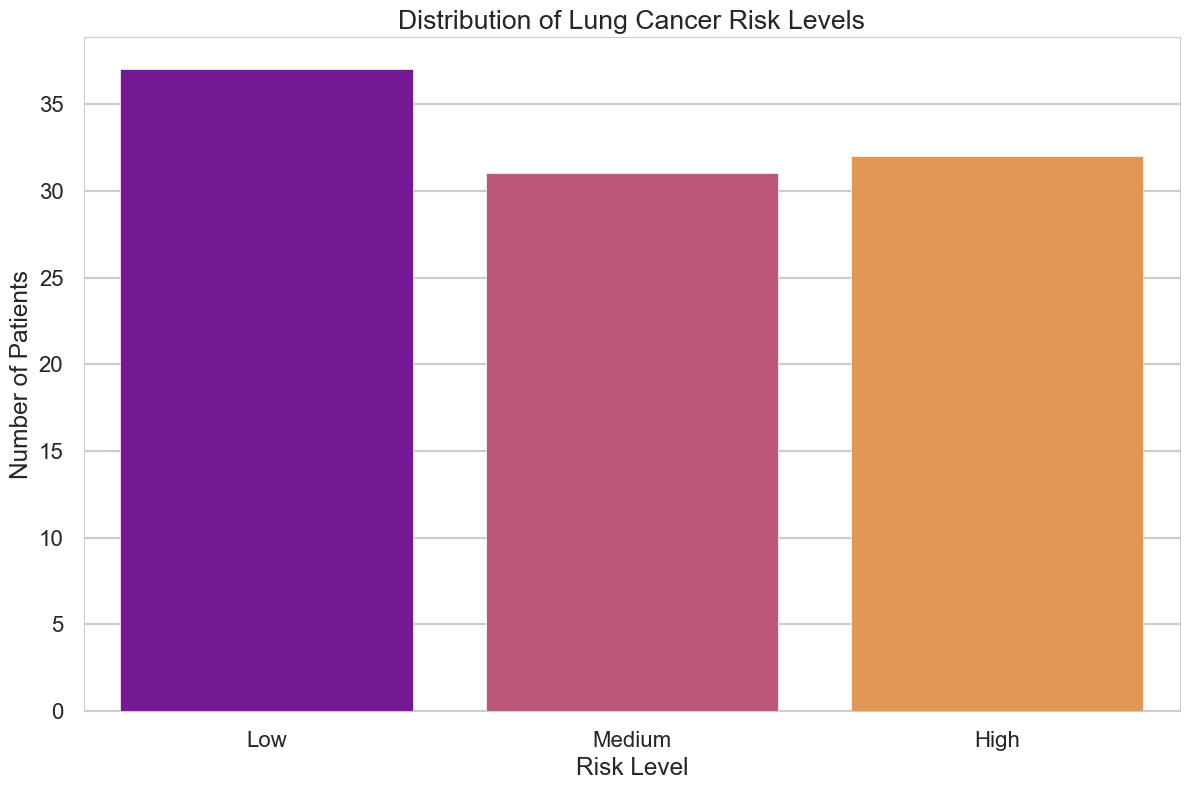

Displayed 'risk_level_distribution' plot.


In [26]:
# c) Distribution of Cancer Risk Level
# Let's see how many patients fall into each risk category.
print("\nPlotting the distribution of cancer risk levels...")
plt.figure(figsize=(12, 8))
sns.countplot(x='Level', data=df, order=['Low', 'Medium', 'High'], palette='plasma', hue='Level', legend=False)
plt.title('Distribution of Lung Cancer Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()
print("Displayed 'risk_level_distribution' plot.")



Plotting gender distribution...


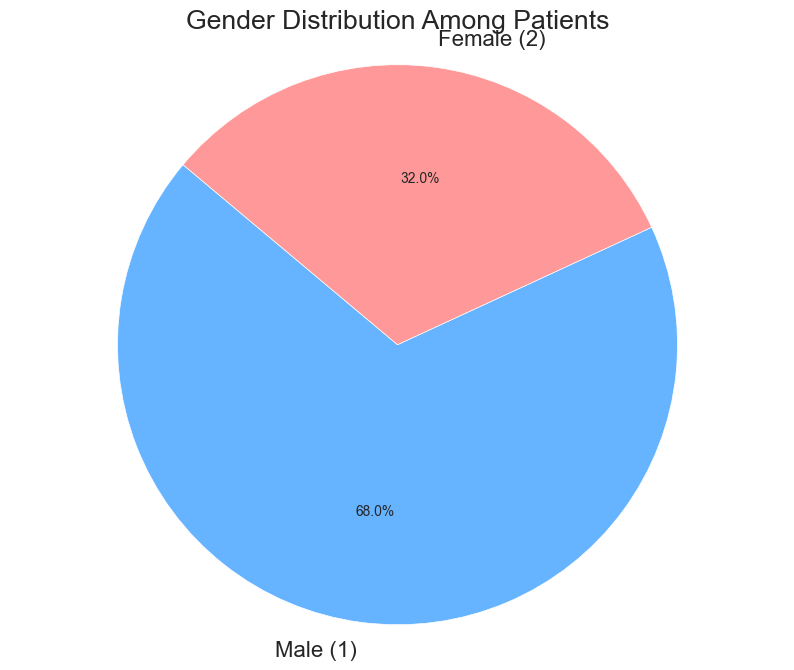

Displayed 'gender_distribution' pie chart.


In [27]:
# d) Gender Distribution (NEW PLOT 1)
# A pie chart is great for showing proportions.
print("\nPlotting gender distribution...")
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=['Male (1)', 'Female (2)'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution Among Patients')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Displayed 'gender_distribution' pie chart.")



Plotting the age distribution of patients...


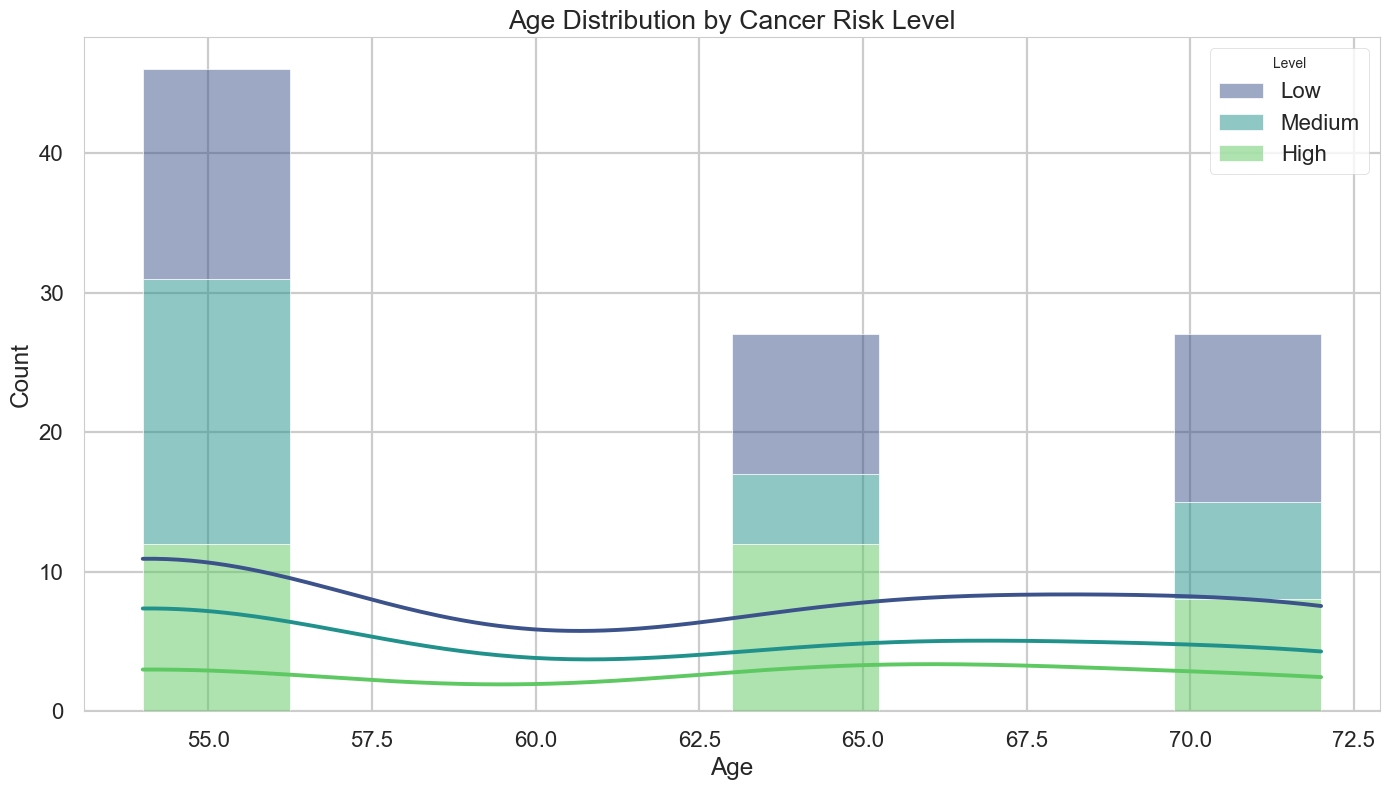

Displayed 'age_distribution' plot.


In [28]:
# e) Age Distribution Analysis
# Understanding the age distribution can provide demographic insights.
print("\nPlotting the age distribution of patients...")
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Age', hue='Level', kde=True, palette='viridis', multiple="stack")
plt.title('Age Distribution by Cancer Risk Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Displayed 'age_distribution' plot.")


Generating Box Plots for every feature vs. risk level...


C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


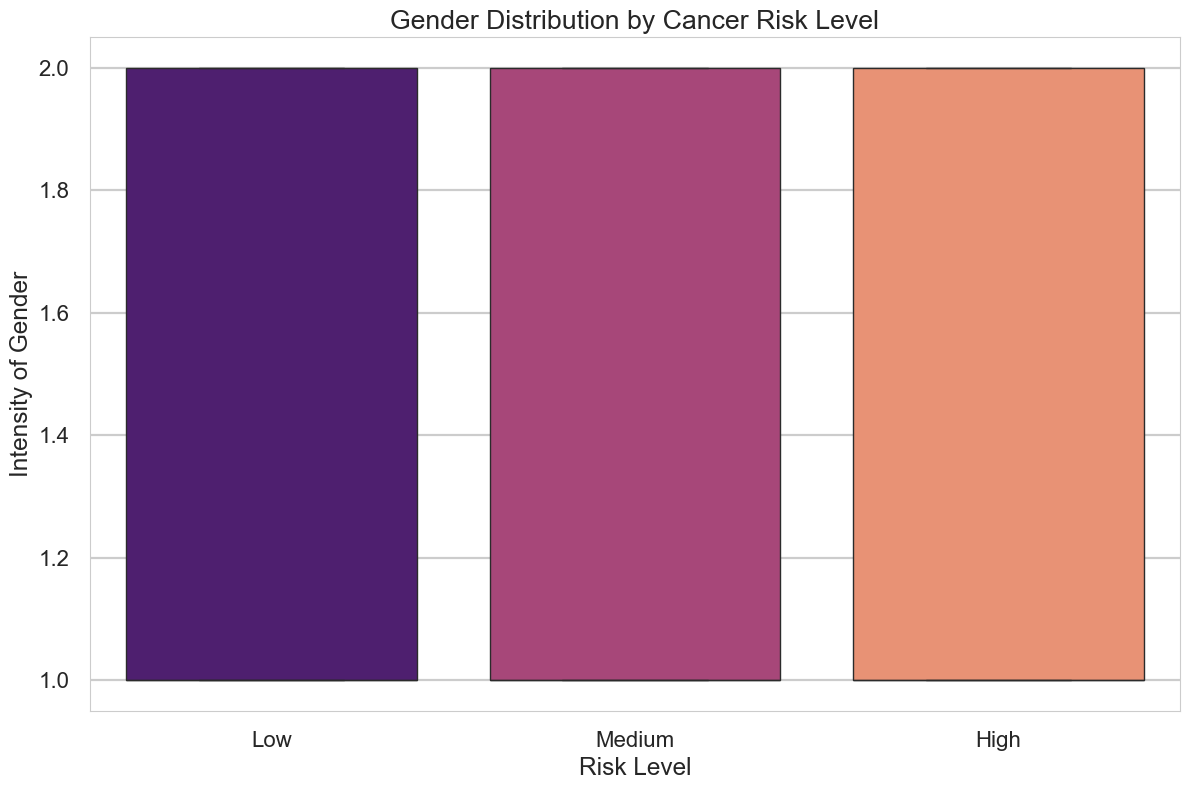

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


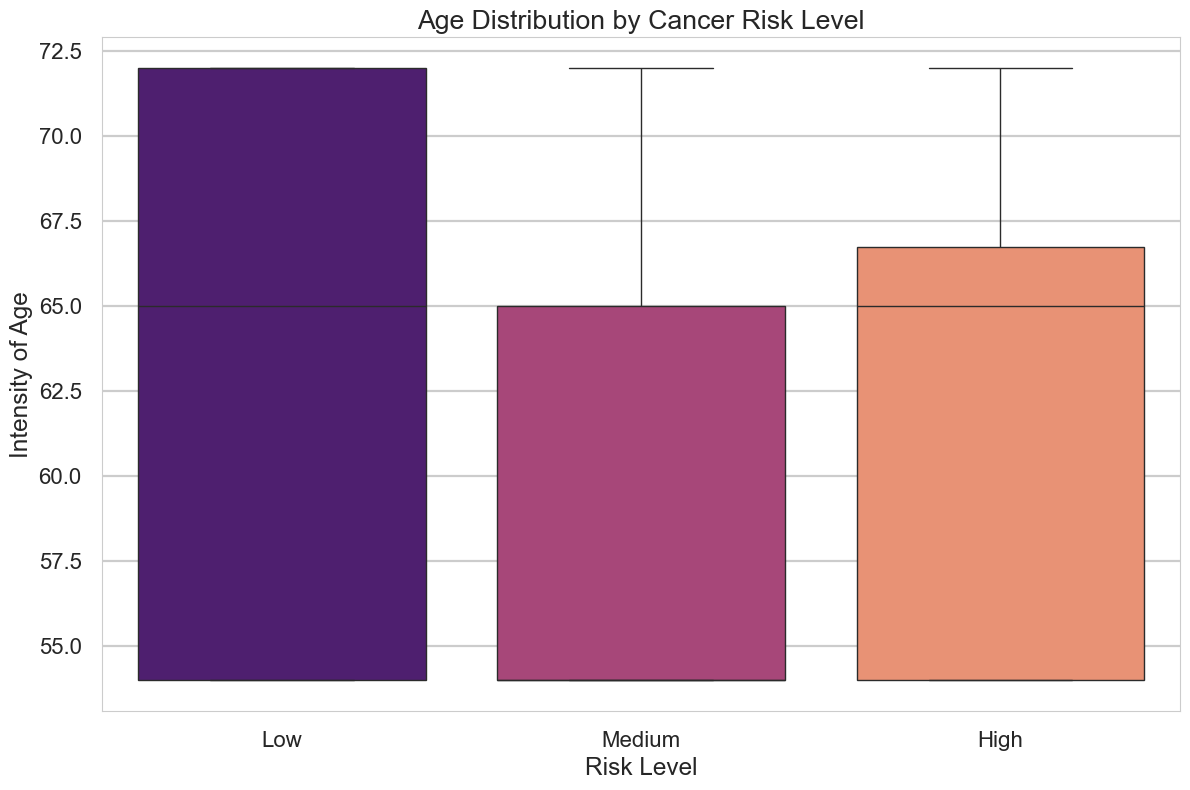

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


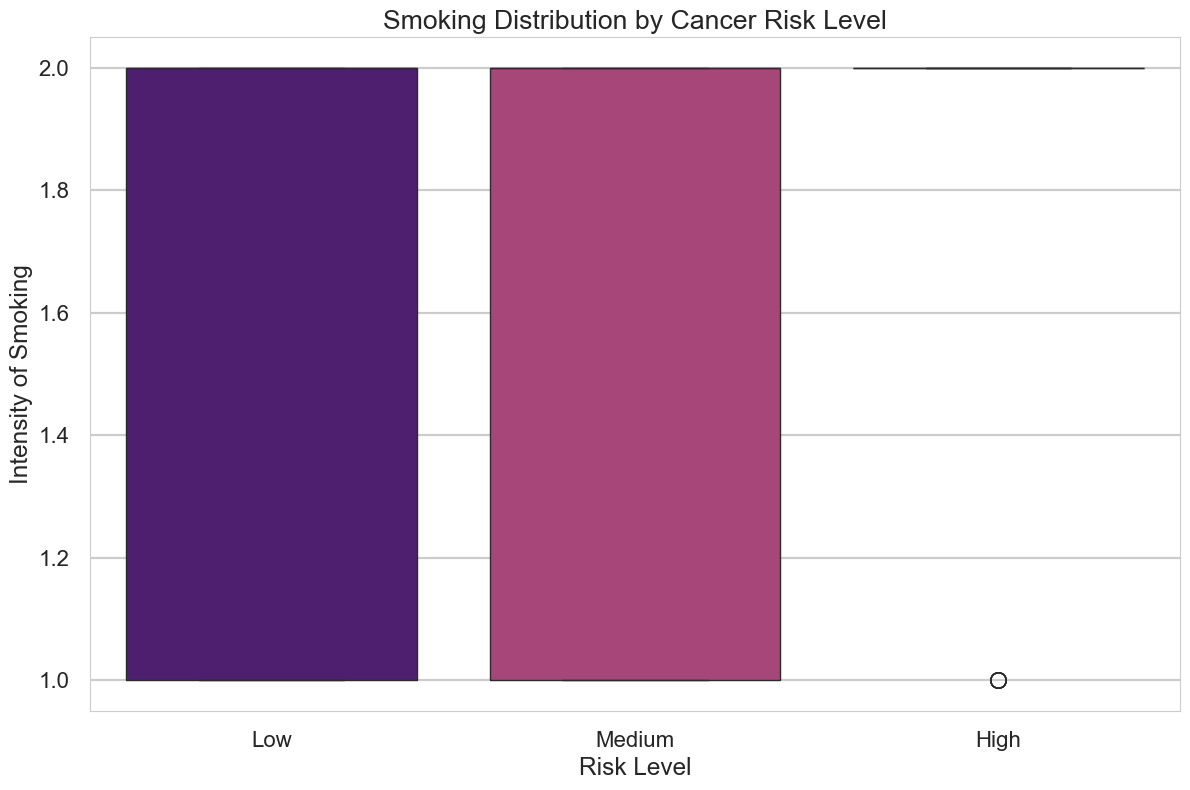

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


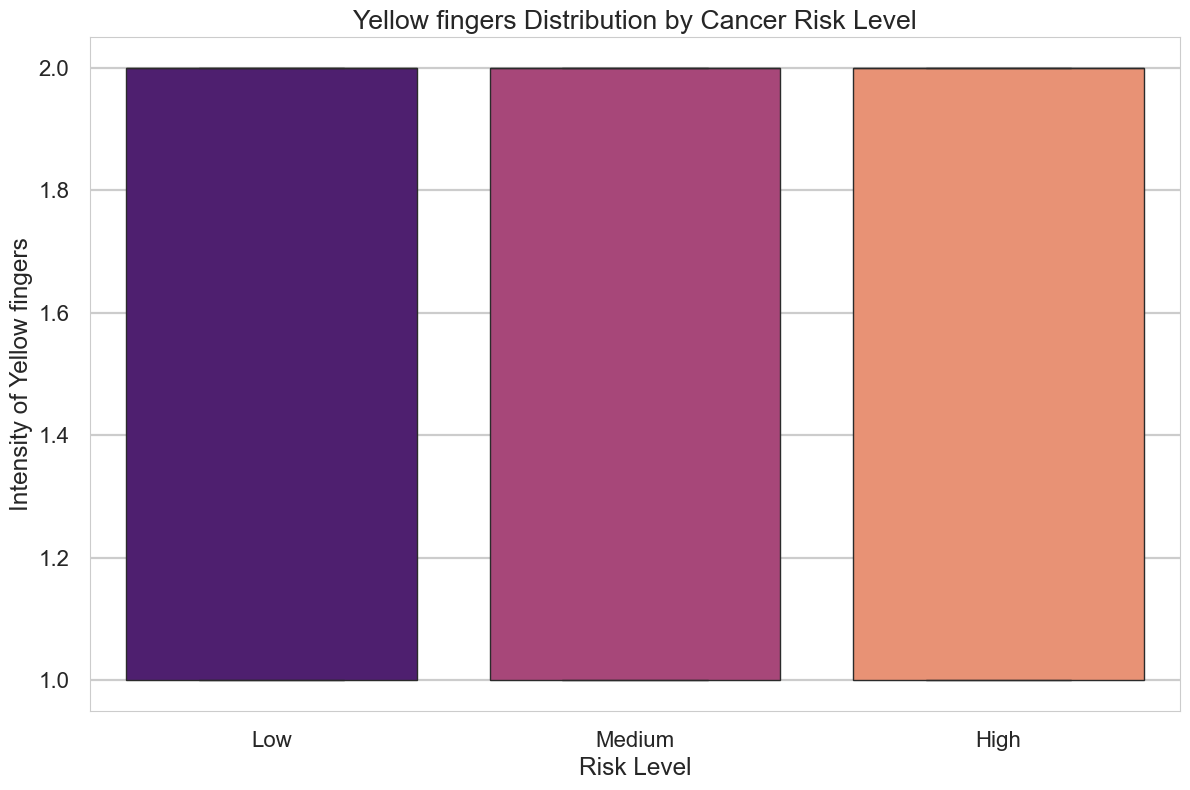

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


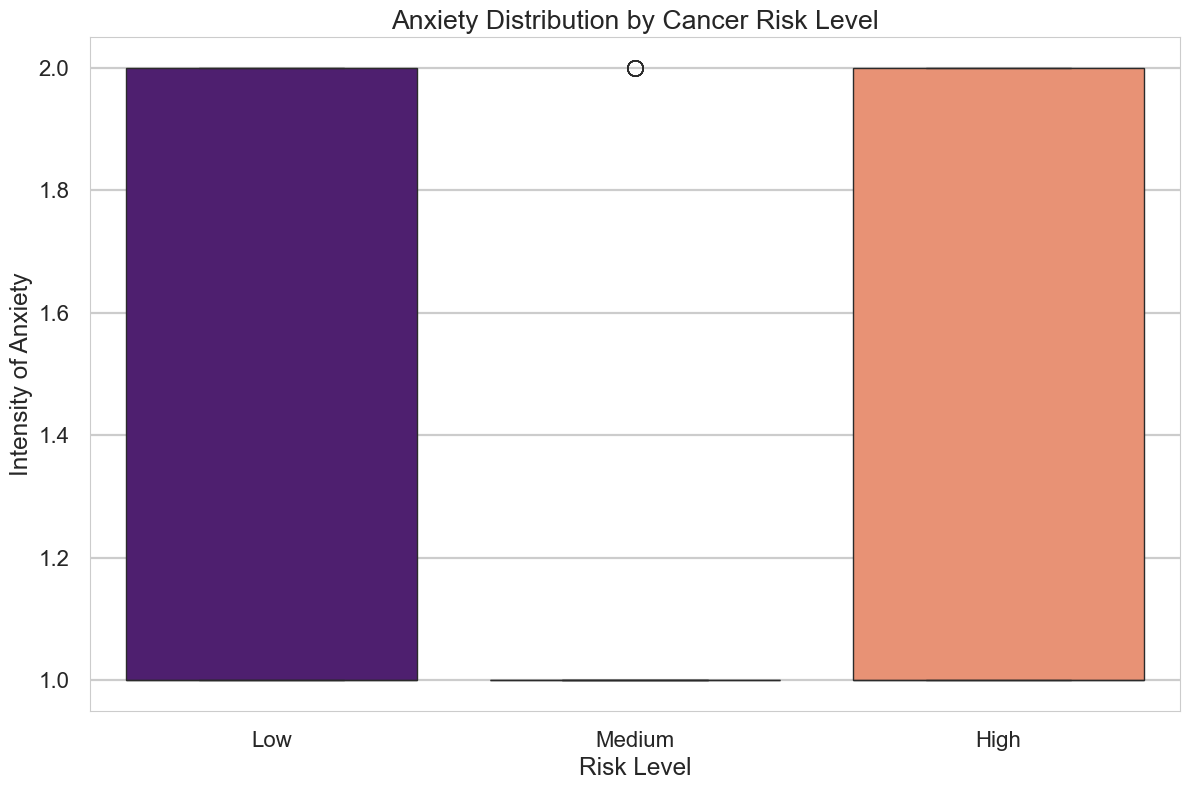

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


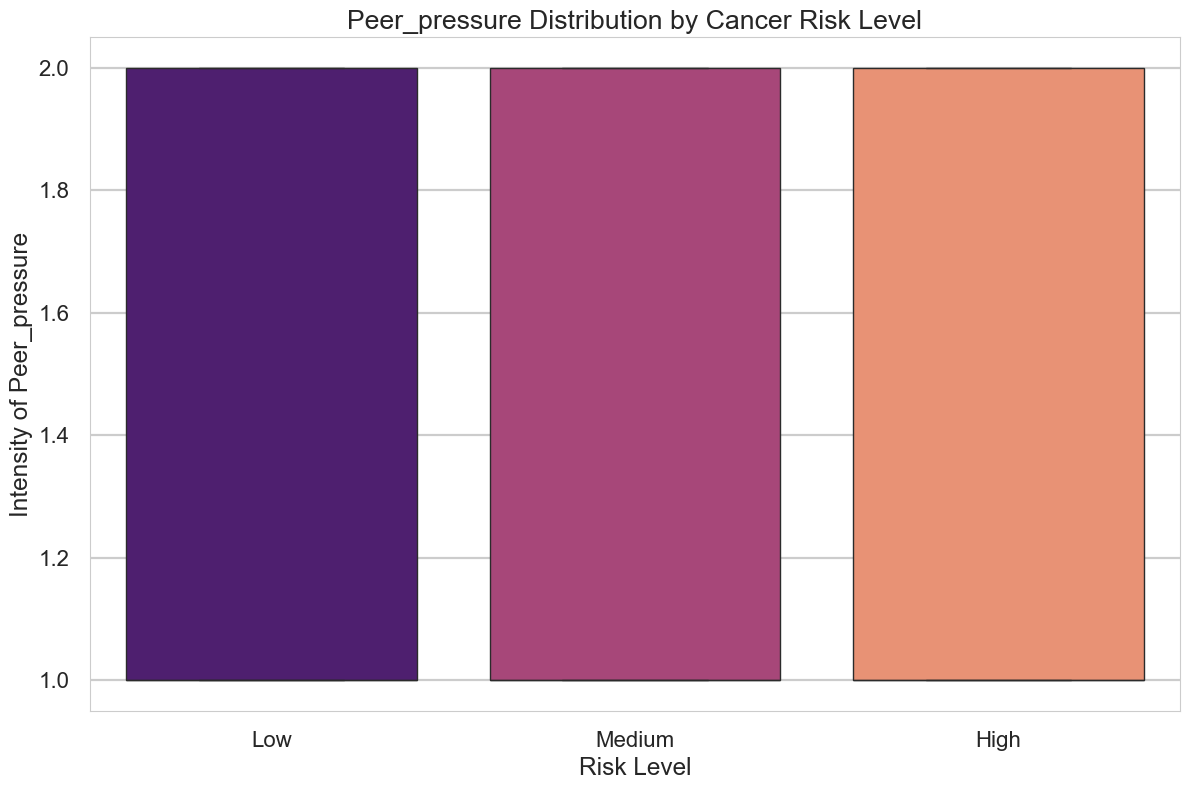

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


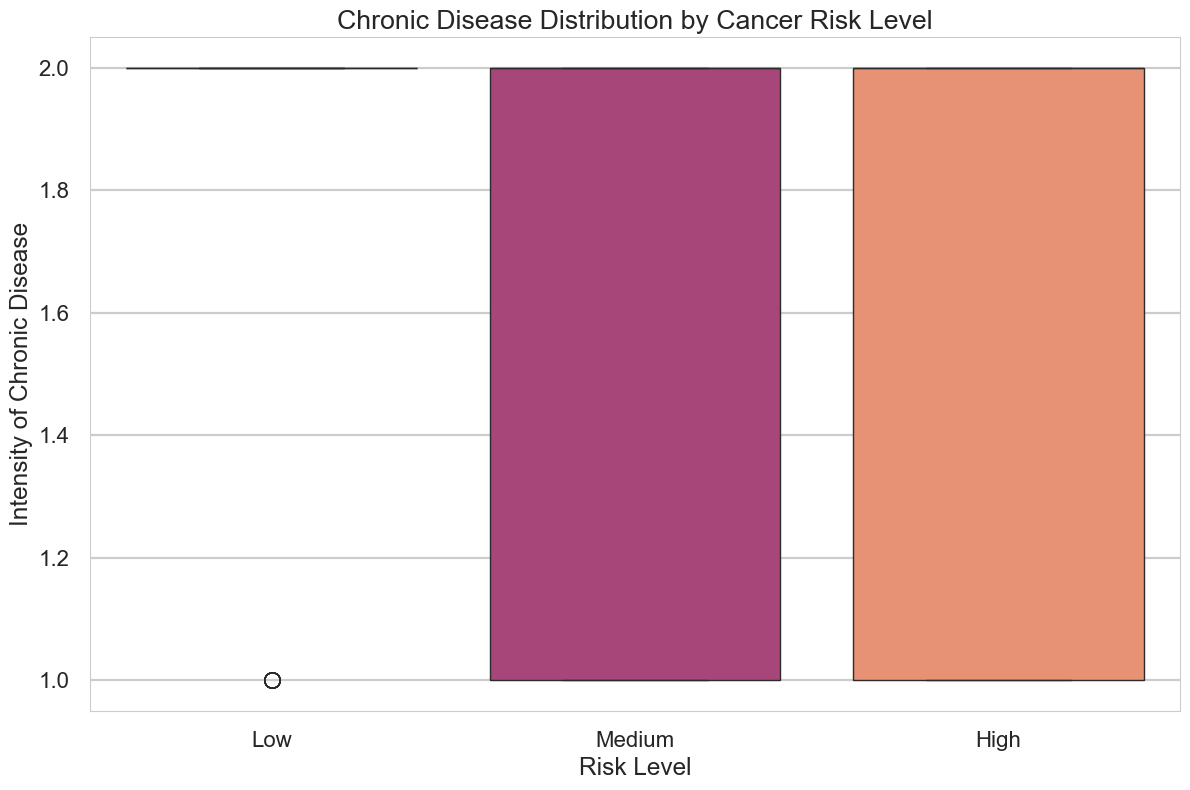

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


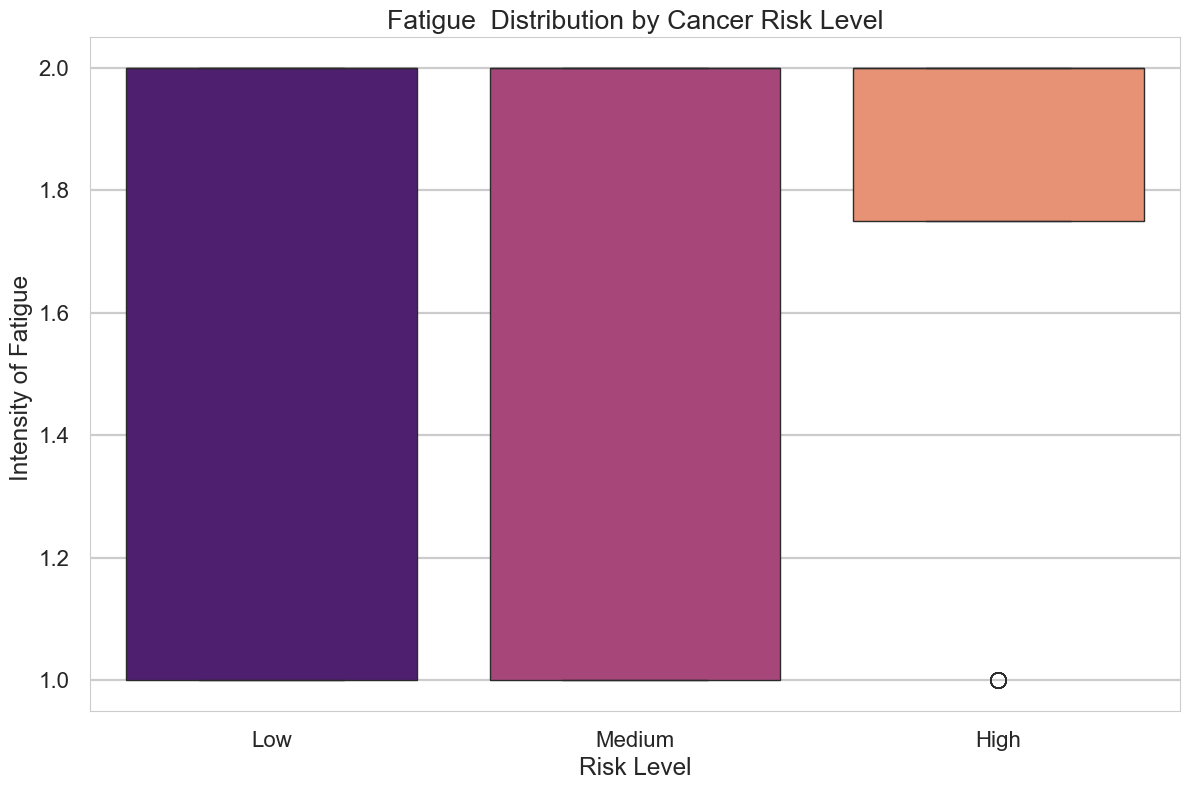

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


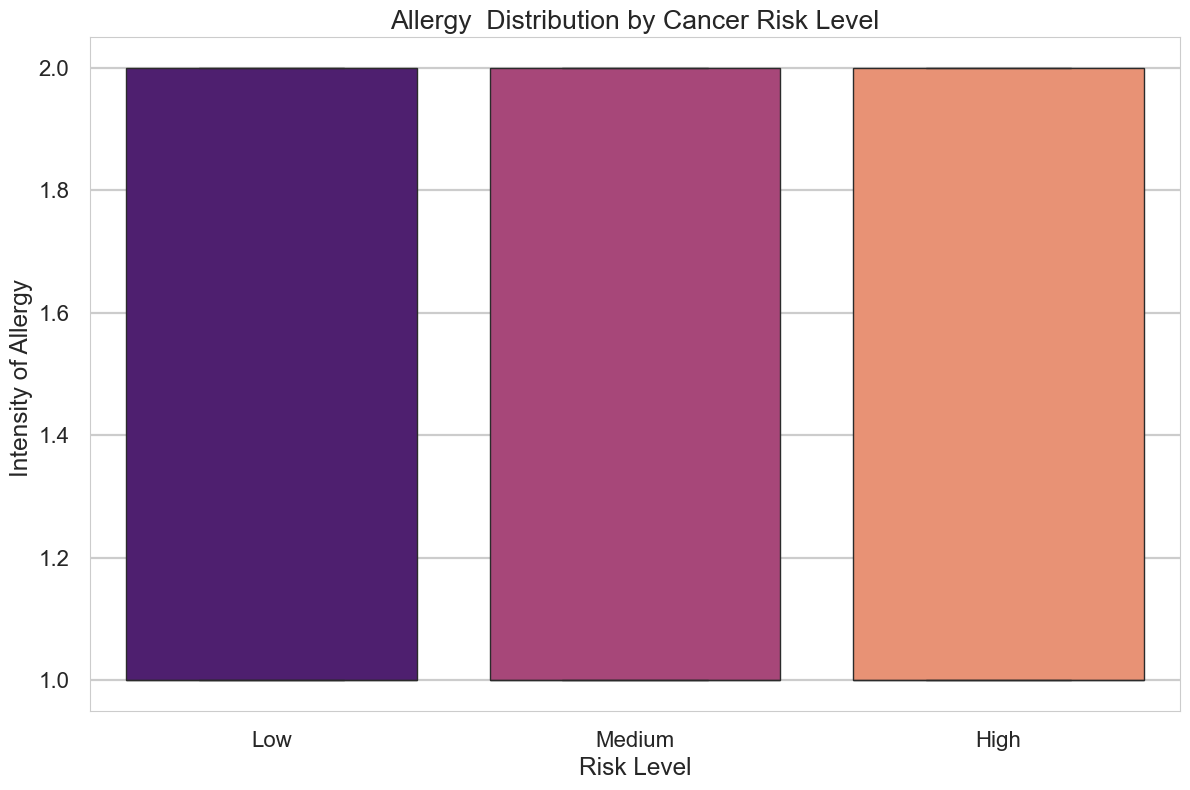

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


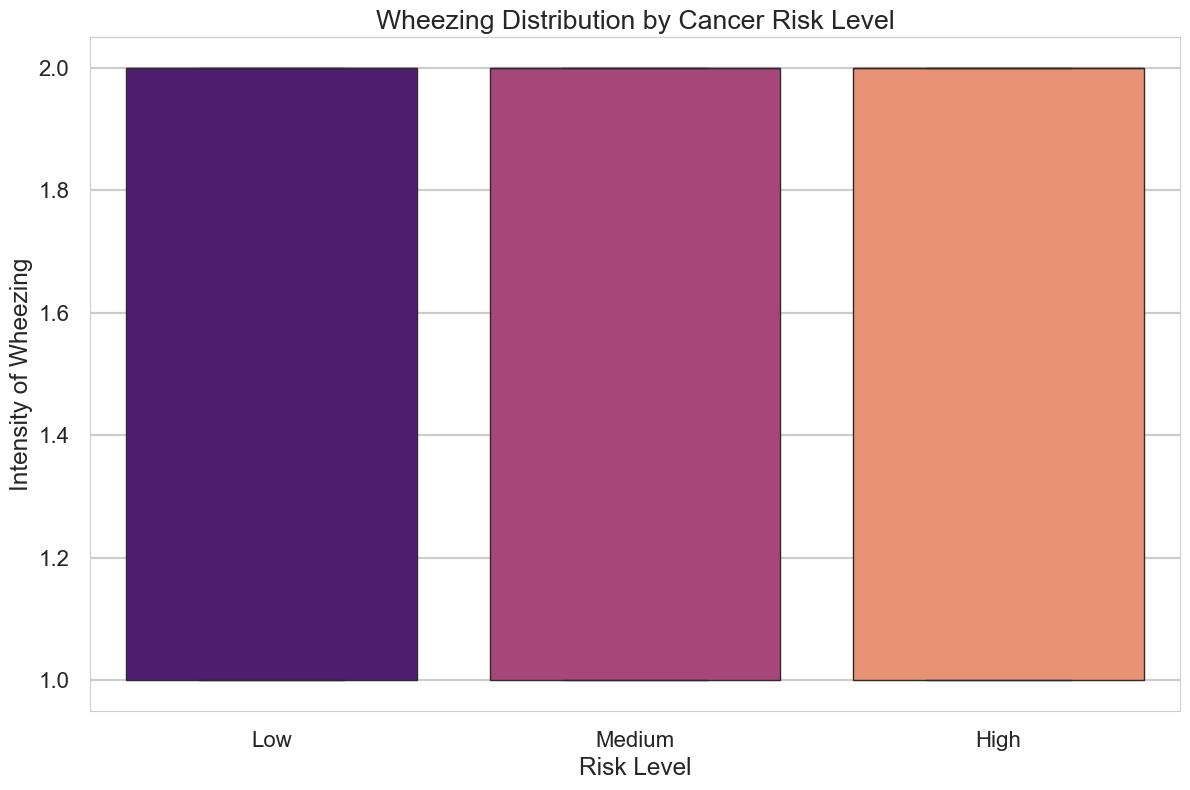

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


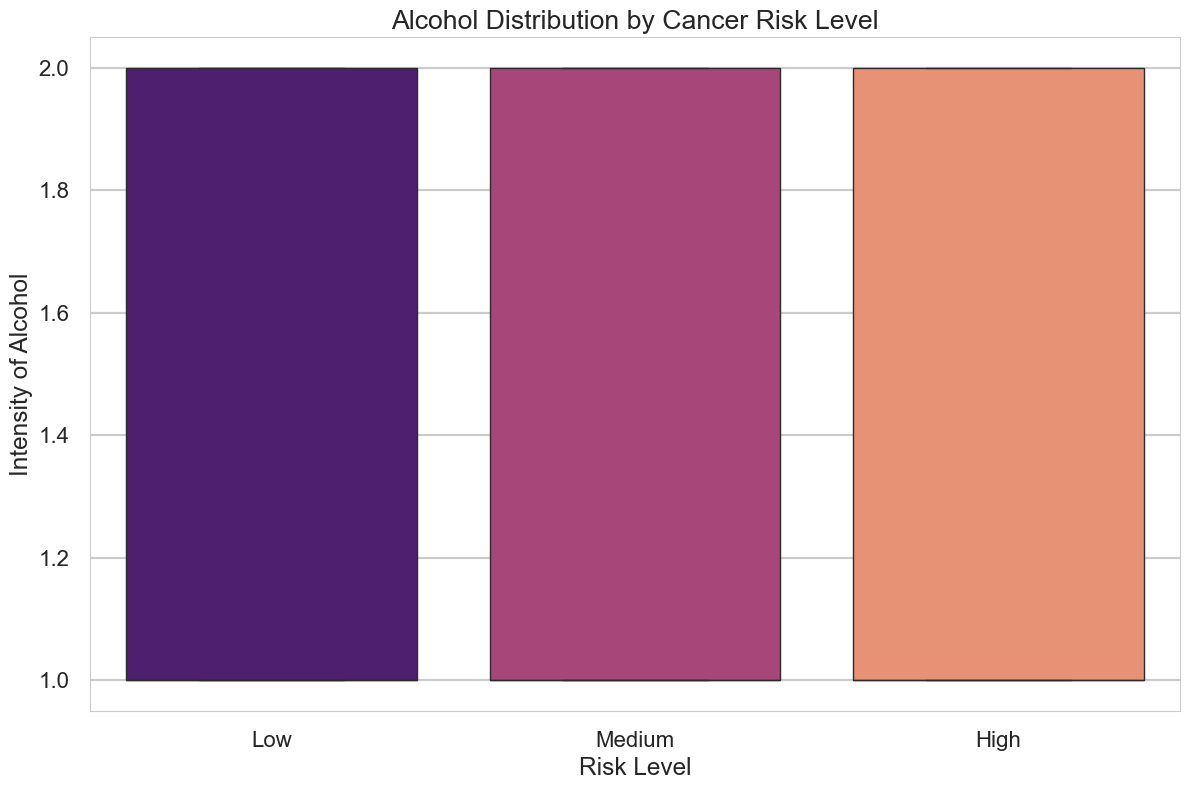

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


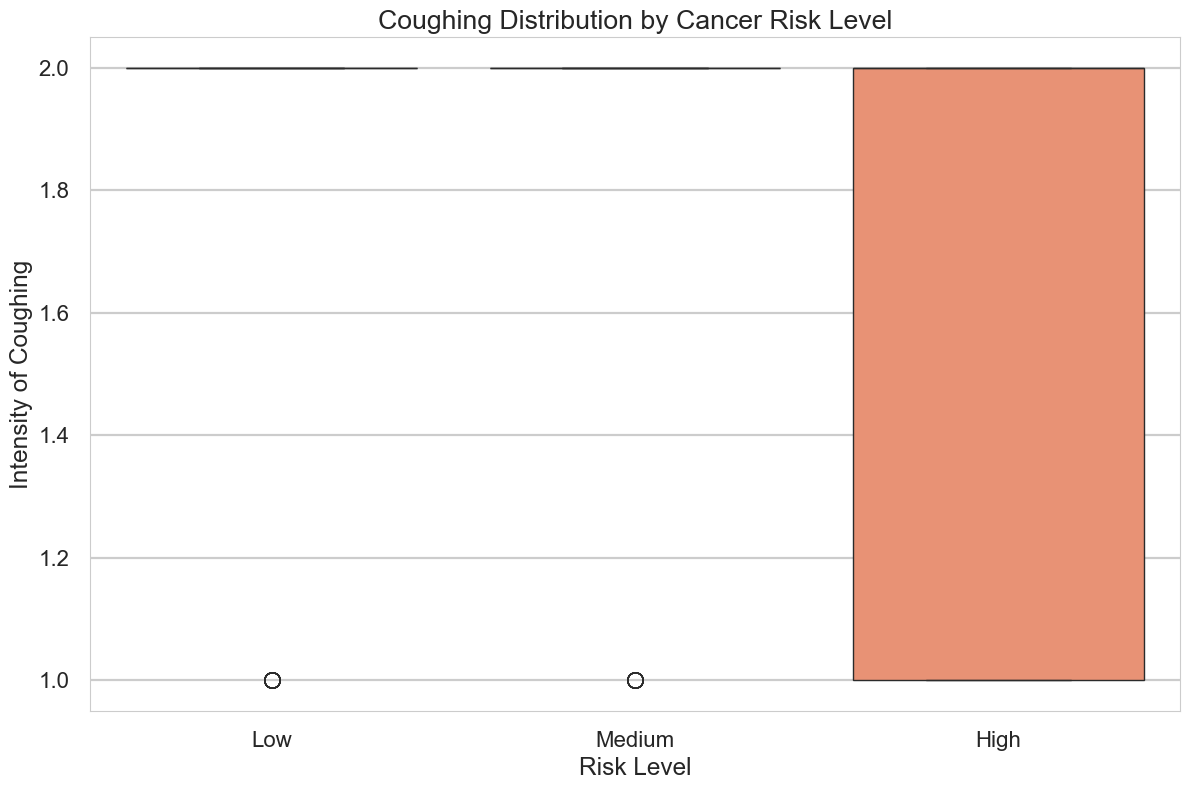

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


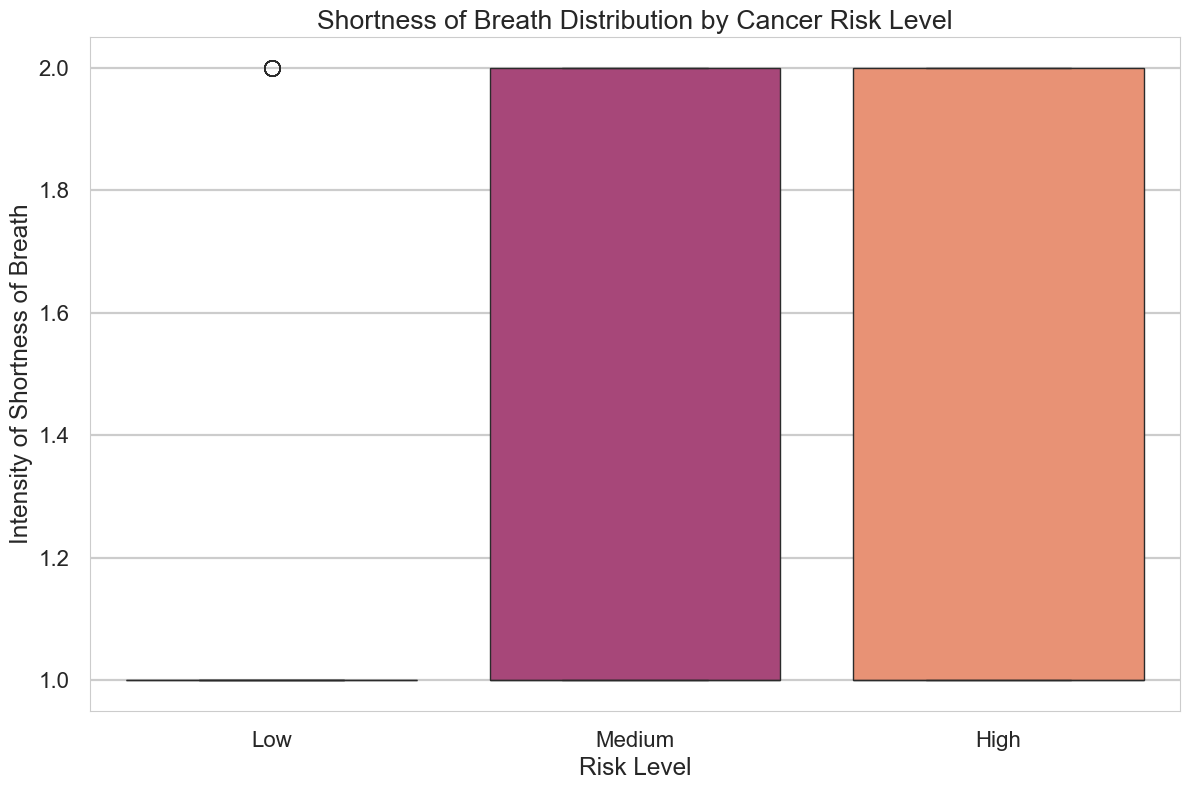

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


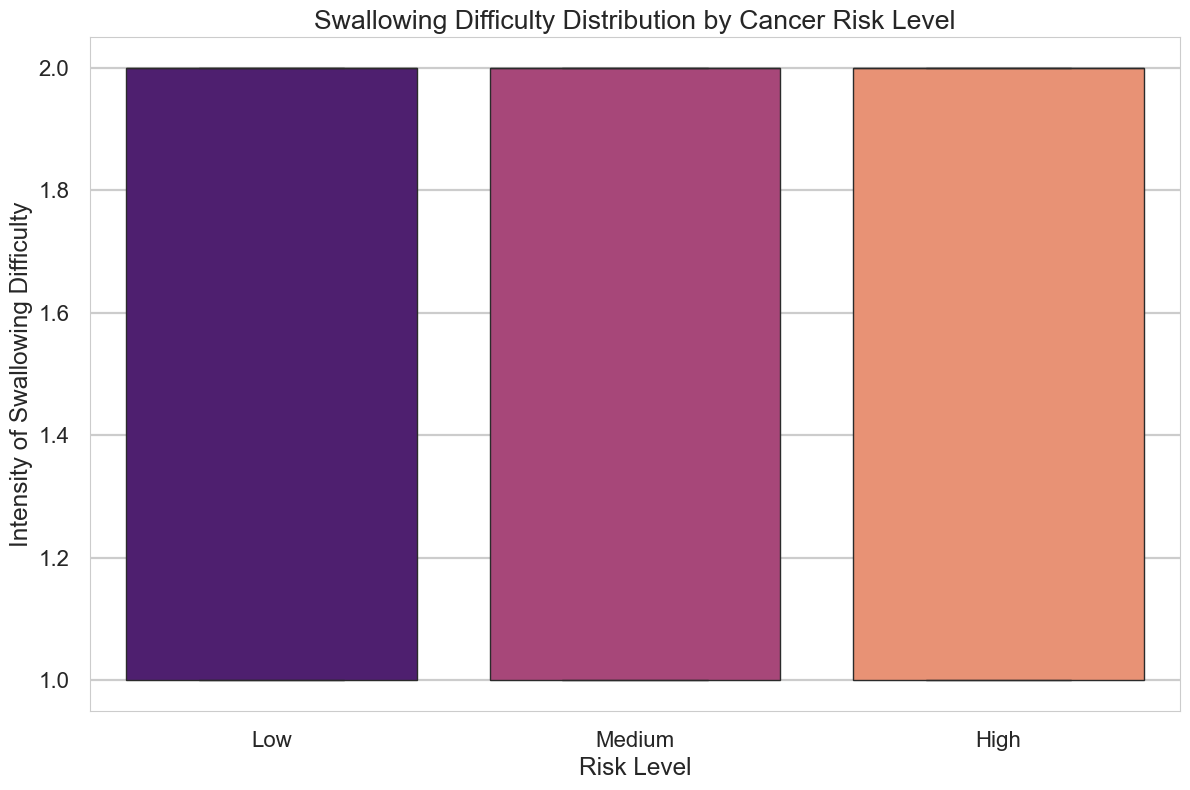

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\702225752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')


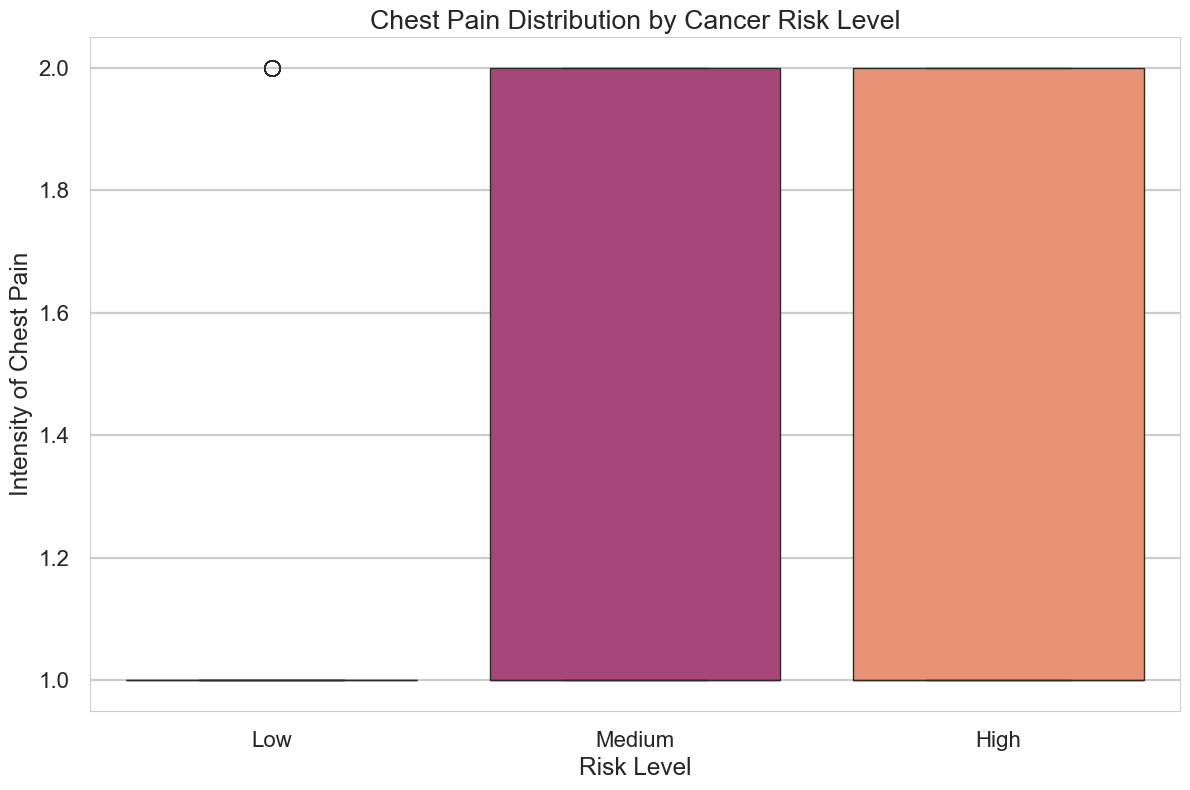

Displayed box plots for all features.


In [29]:
# f) Box Plots for All Features vs. Risk Level (NEW PLOTS 2-24)
# This is a deep dive to compare the distribution of every single factor
# across the different risk levels.
print("\nGenerating Box Plots for every feature vs. risk level...")
features_to_plot = df.drop(['Level', 'Level_encoded'], axis=1).columns
for feature in features_to_plot:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='magma')
    plt.title(f'{feature} Distribution by Cancer Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(f'Intensity of {feature}')
    plt.tight_layout()
    plt.show()
print("Displayed box plots for all features.")


Plotting the correlation heatmap...


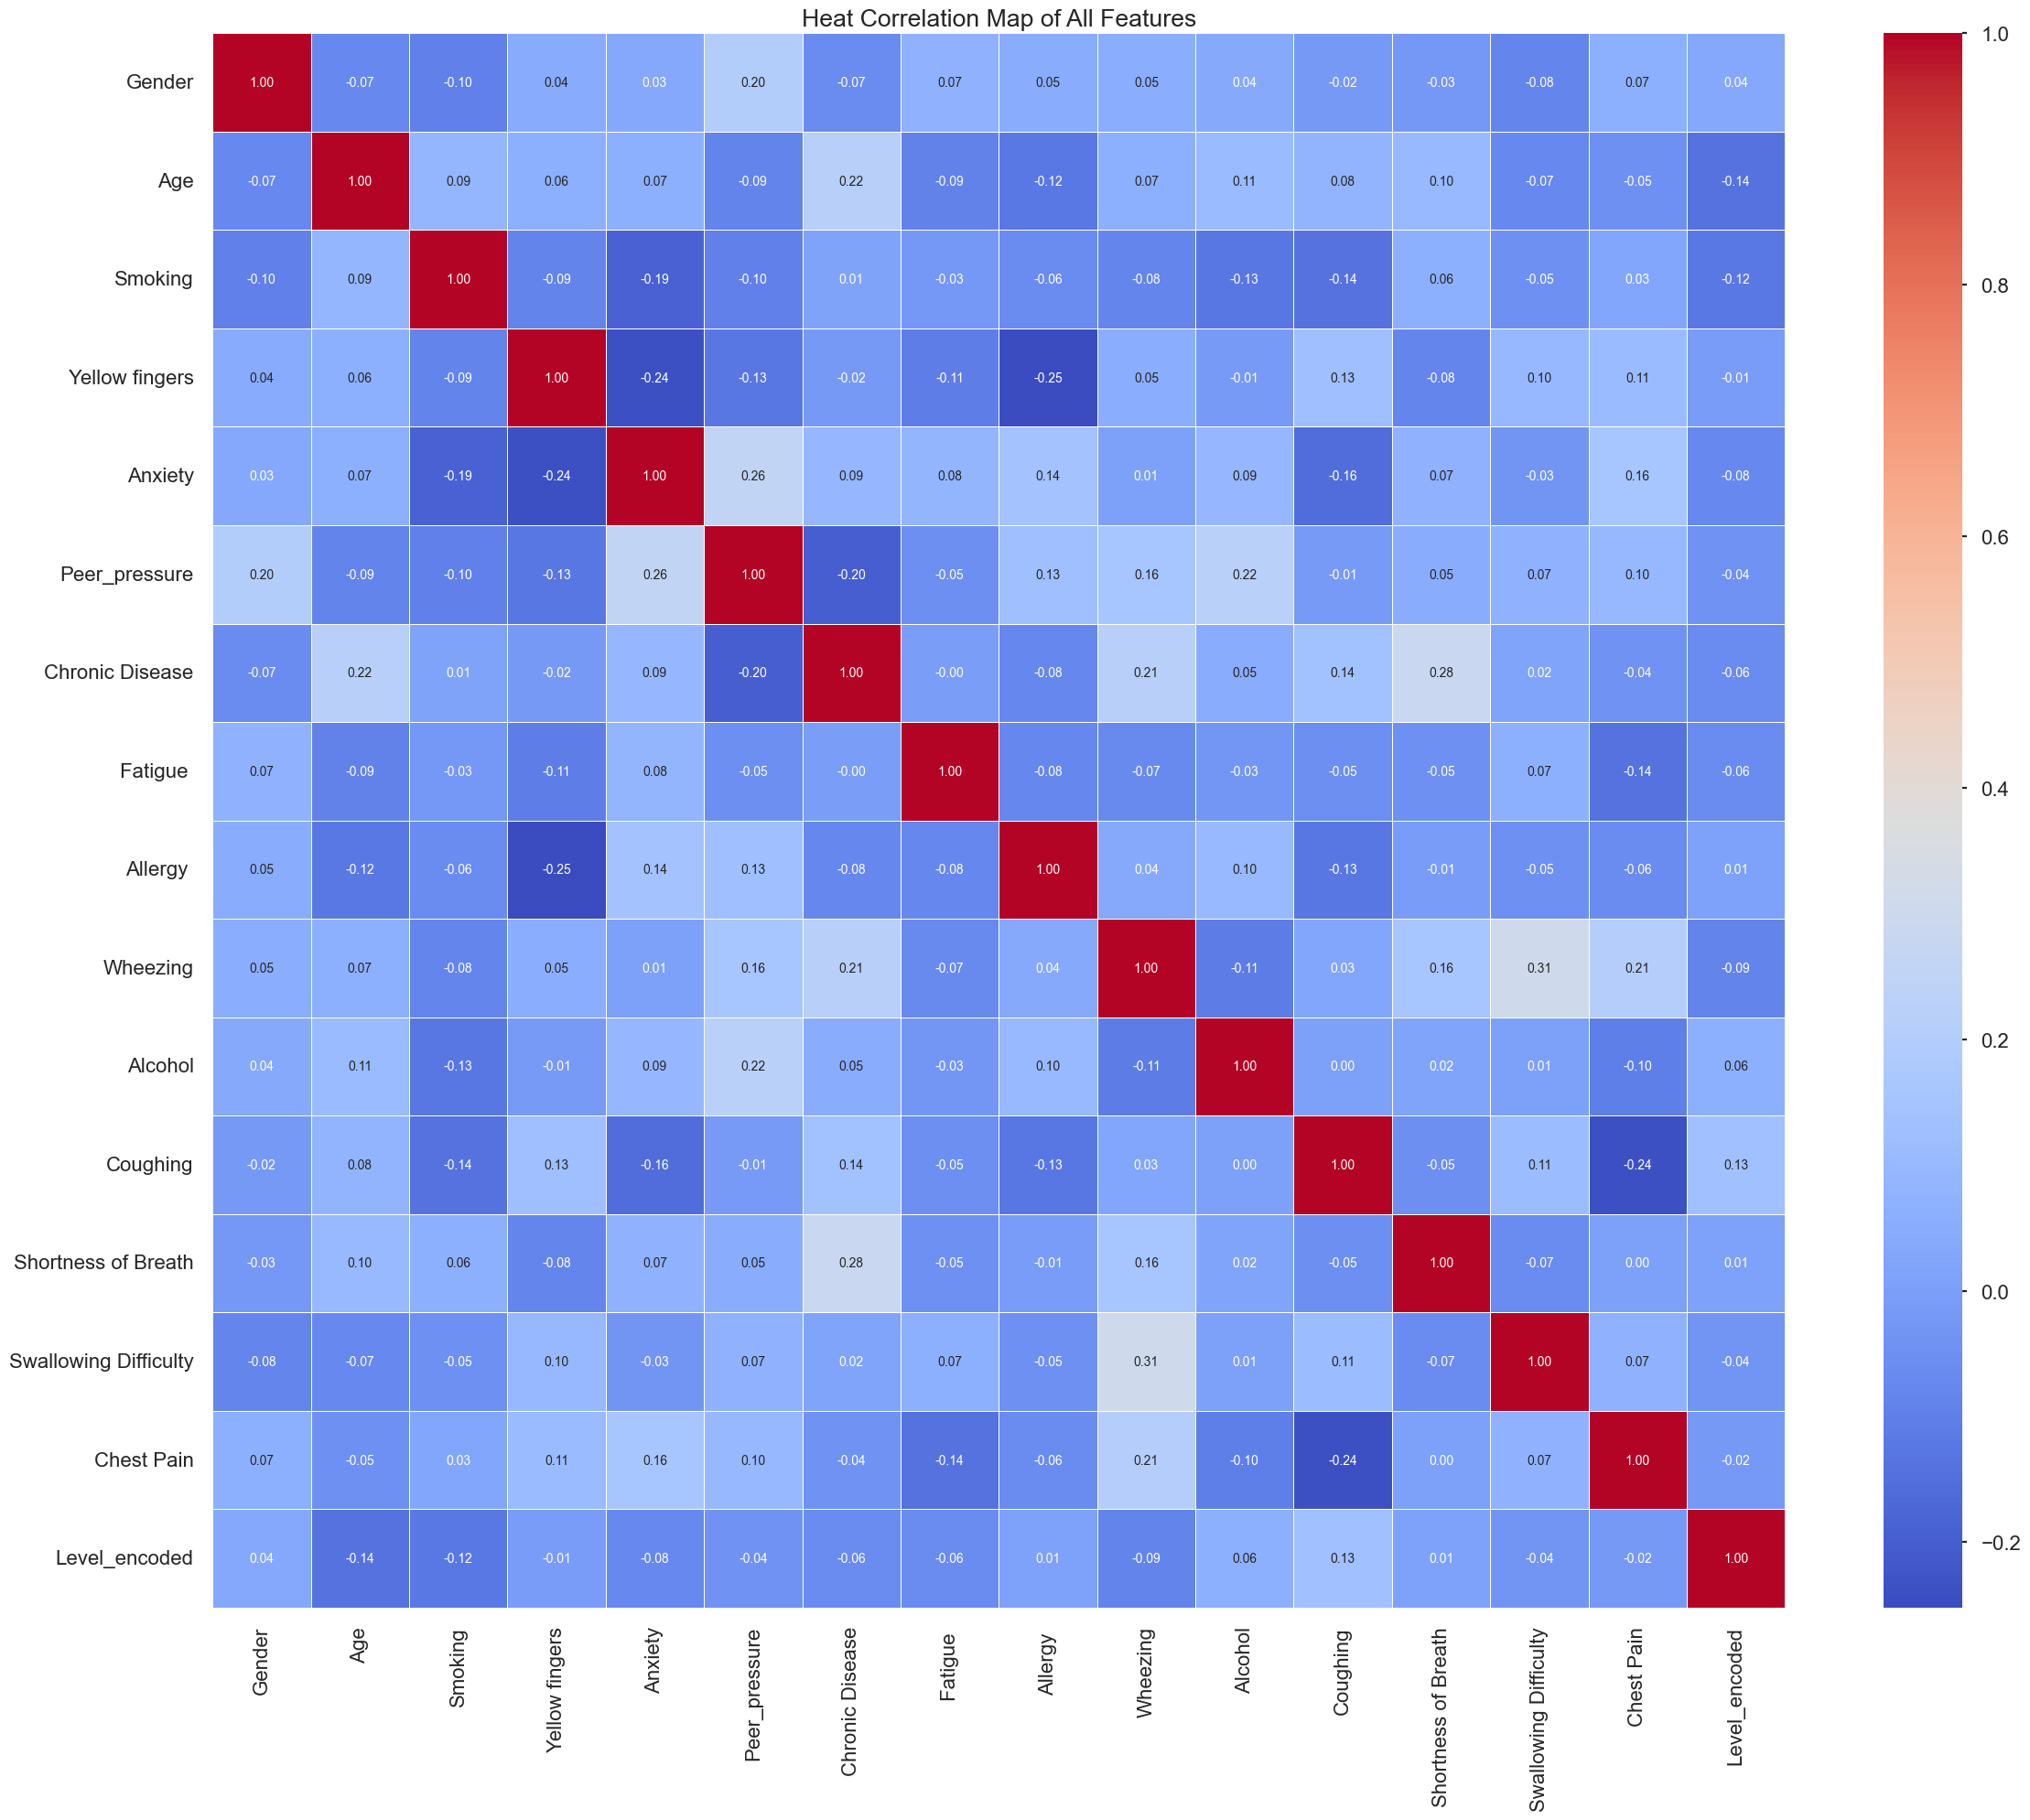

Displayed 'correlation_heatmap' plot.


In [30]:
# g) Correlation Heatmap
# A heatmap shows us how strongly each feature is related to others.
# Red means a strong positive correlation, blue means a strong negative one.
print("\nPlotting the correlation heatmap...")
plt.figure(figsize=(24, 20))
sns.heatmap(df.drop('Level', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heat Correlation Map of All Features')
plt.tight_layout()
plt.show()
print("Displayed 'correlation_heatmap' plot.")


Generating Swarm Plot for Age vs. Risk Level...


C:\Users\USER\AppData\Local\Temp\ipykernel_10928\2573522151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Level', y='Age', data=df, order=['Low', 'Medium', 'High'], palette='coolwarm')


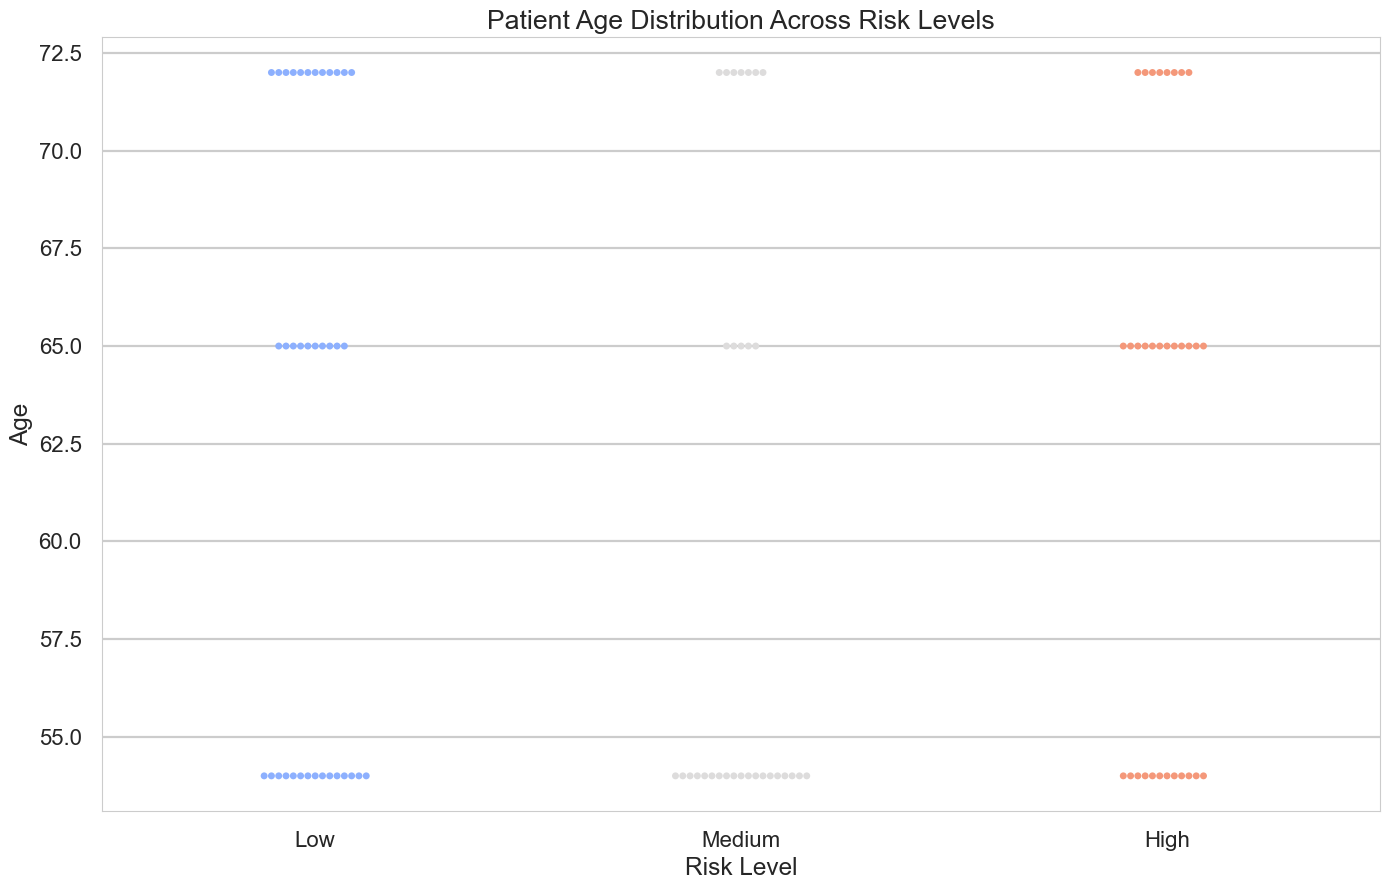

Displayed 'swarm_plot' for Age.


In [31]:
# h) Swarm Plot for Age vs. Risk (NEW PLOT 25)
# A swarm plot shows individual data points, which can reveal distributions
# in a way that box plots can't.
print("\nGenerating Swarm Plot for Age vs. Risk Level...")
plt.figure(figsize=(14, 9))
sns.swarmplot(x='Level', y='Age', data=df, order=['Low', 'Medium', 'High'], palette='coolwarm')
plt.title('Patient Age Distribution Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.tight_layout()
plt.show()
print("Displayed 'swarm_plot' for Age.")


Plotting violin plots for key features...


C:\Users\USER\AppData\Local\Temp\ipykernel_10928\4271546637.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='viridis')


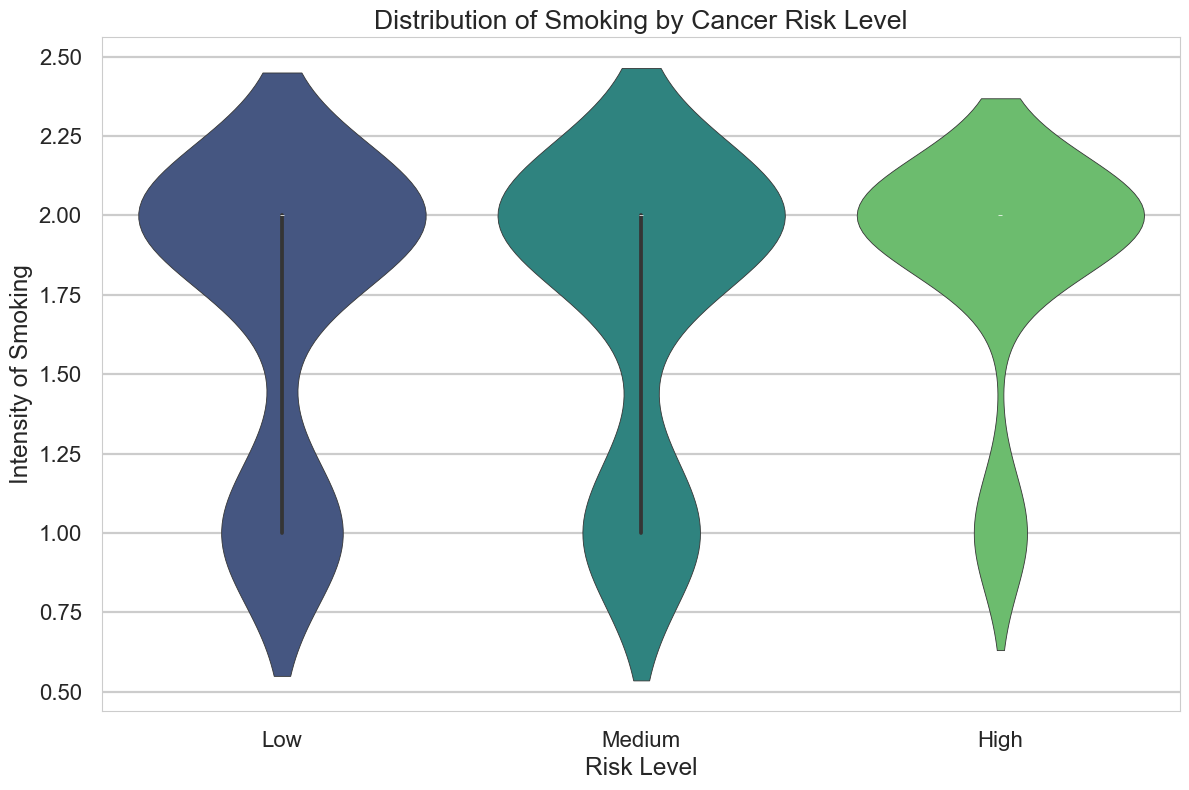

Displayed violin plots for available top 5 correlated features.


In [32]:
# Violin plots combine a box plot with a kernel density plot, showing both
# the summary statistics and the distribution of the data.
print("\nPlotting violin plots for key features...")
top_corr_features = ['Alcohol use', 'OccuPational Hazards', 'Genetic Risk', 'Dust Allergy', 'Smoking']
for feature in top_corr_features:
    if feature in df.columns:
        plt.figure(figsize=(12, 8))
        sns.violinplot(x='Level', y=feature, data=df, order=['Low', 'Medium', 'High'], palette='viridis')
        plt.title(f'Distribution of {feature} by Cancer Risk Level')
        plt.xlabel('Risk Level')
        plt.ylabel(f'Intensity of {feature}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in dataset. Skipping violin plot for this feature.")
print("Displayed violin plots for available top 5 correlated features.")


In [33]:
# We need to split our data into two parts:
# 1. Features (X): The input data (symptoms, habits, etc.).
# 2. Target (y): The output we want to predict (the cancer risk level).
# Then, we split it further into a training set (for teaching the model) and a
# testing set (for evaluating how well it learned).

print("\n--- Preparing Data for Machine Learning ---")
X = df.drop(['Level', 'Level_encoded'], axis=1)
y = df['Level_encoded']
print("Separated data into features (X) and target (y).")
# We use 80% of the data for training and 20% for testing.
# 'stratify=y' ensures that the proportion of Low, Medium, and High is the
# same in both the training and testing sets. This is crucial for imbalanced data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")


--- Preparing Data for Machine Learning ---
Separated data into features (X) and target (y).
Data split into training (80 samples) and testing (20 samples) sets.



--- Training and Evaluating Machine Learning Models ---

----- Evaluating: Random Forest -----


Random Forest has been trained successfully.

Accuracy on Test Data: 20.00%

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
         Low       0.33      0.29      0.31         7
      Medium       0.22      0.33      0.27         6

    accuracy                           0.20        20
   macro avg       0.19      0.21      0.19        20
weighted avg       0.18      0.20      0.19        20



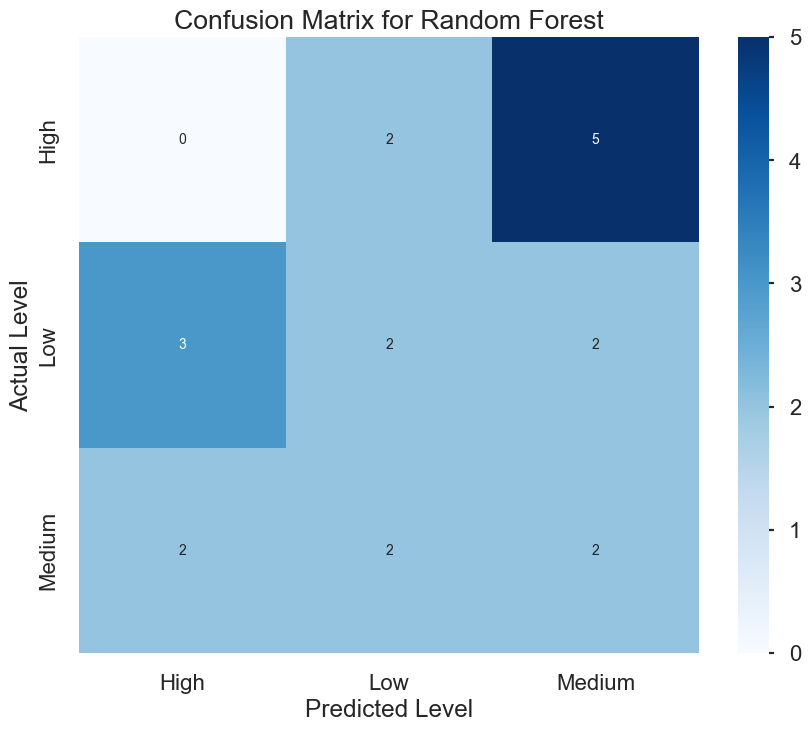

Displayed 'Random Forest_confusion_matrix' plot.

----- Evaluating: Gradient Boosting -----
Gradient Boosting has been trained successfully.

Accuracy on Test Data: 50.00%

Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.29      0.36         7
         Low       0.57      0.57      0.57         7
      Medium       0.44      0.67      0.53         6

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.49        20
weighted avg       0.51      0.50      0.49        20



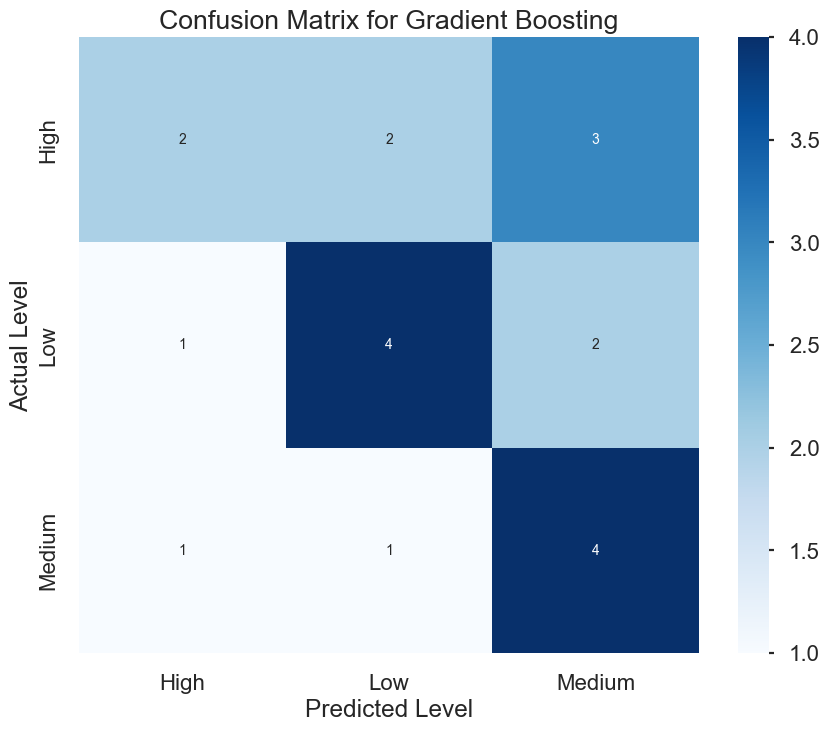

Displayed 'Gradient Boosting_confusion_matrix' plot.


In [34]:
# Step 5: Training and Evaluating Machine Learning Models
# ==============================================================================
# This is where the magic happens! We'll train two powerful models and see
# which one performs better on our data.

print("\n--- Training and Evaluating Machine Learning Models ---")

# We are choosing two excellent 'ensemble' models:
# 1. RandomForest: Works by creating many decision trees and taking a vote.
#    It's fast, robust, and great at preventing overfitting.
# 2. GradientBoosting: Builds trees one by one, where each new tree corrects
#    the errors of the previous one. It's often extremely accurate.
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"\n----- Evaluating: {model_name} -----")
    
    # The .fit() method is where the model learns from the training data.
    model.fit(X_train, y_train)
    print(f"{model_name} has been trained successfully.")
    
    # The .predict() method makes predictions on the unseen test data.
    y_pred = model.predict(X_test)
    
    # We compare the model's predictions (y_pred) with the actual answers (y_test).
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print(f"\nAccuracy on Test Data: {accuracy * 100:.2f}%")
    
    # The Classification Report gives us a detailed look at performance, including:
    # - Precision: Of all the times it predicted a level, how often was it right?
    # - Recall: Of all the actual cases of a level, how many did it find?
    # - F1-Score: A combined score of Precision and Recall.
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # The Confusion Matrix visually shows us where the model got things right
    # and where it got confused.
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(le.classes_), yticklabels=list(le.classes_))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Level')
    plt.xlabel('Predicted Level')
    plt.show()
    print(f"Displayed '{model_name}_confusion_matrix' plot.")


--- Final Model Comparison ---
               Model  Accuracy
1  Gradient Boosting       0.5
0      Random Forest       0.2


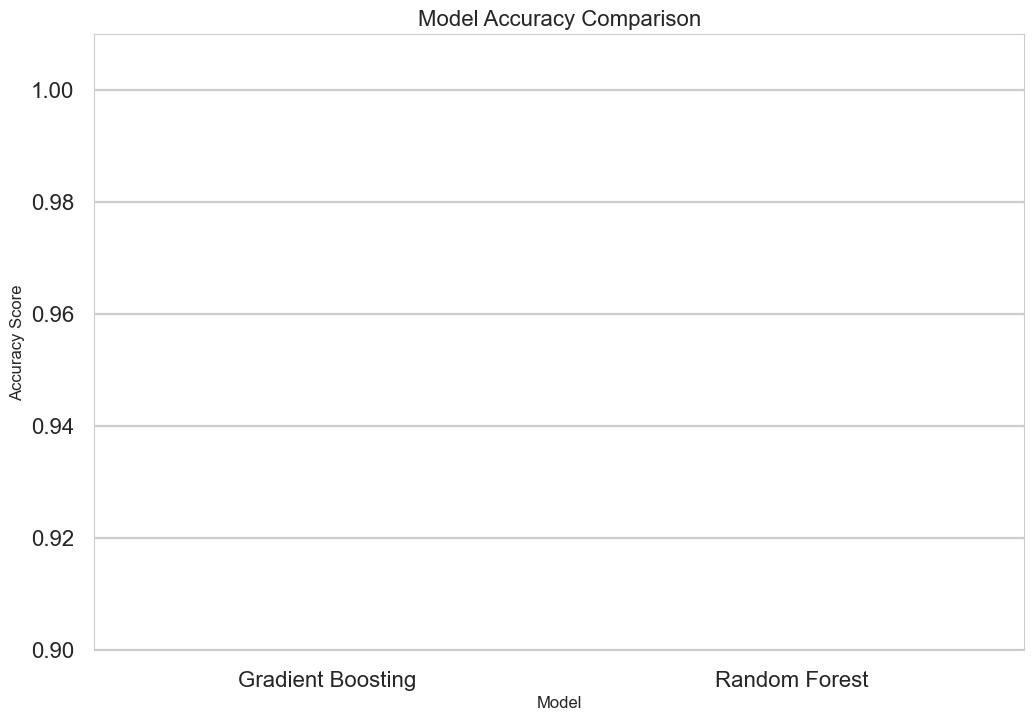

Displayed 'model_comparison' plot.


In [35]:
print("\n--- Final Model Comparison ---")
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)
print(results_df)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='rocket', hue='Model', legend=False)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.9, 1.01)
for p in ax.patches:
    height = getattr(p, 'get_height', lambda: None)()
    width = getattr(p, 'get_width', lambda: None)()
    x = getattr(p, 'get_x', lambda: None)()
    if height is not None and width is not None and x is not None:
        ax.annotate(f'{height * 100:.2f}%', (x + width / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=14)
plt.show()
print("Displayed 'model_comparison' plot.")



--- Feature Importance Analysis ---


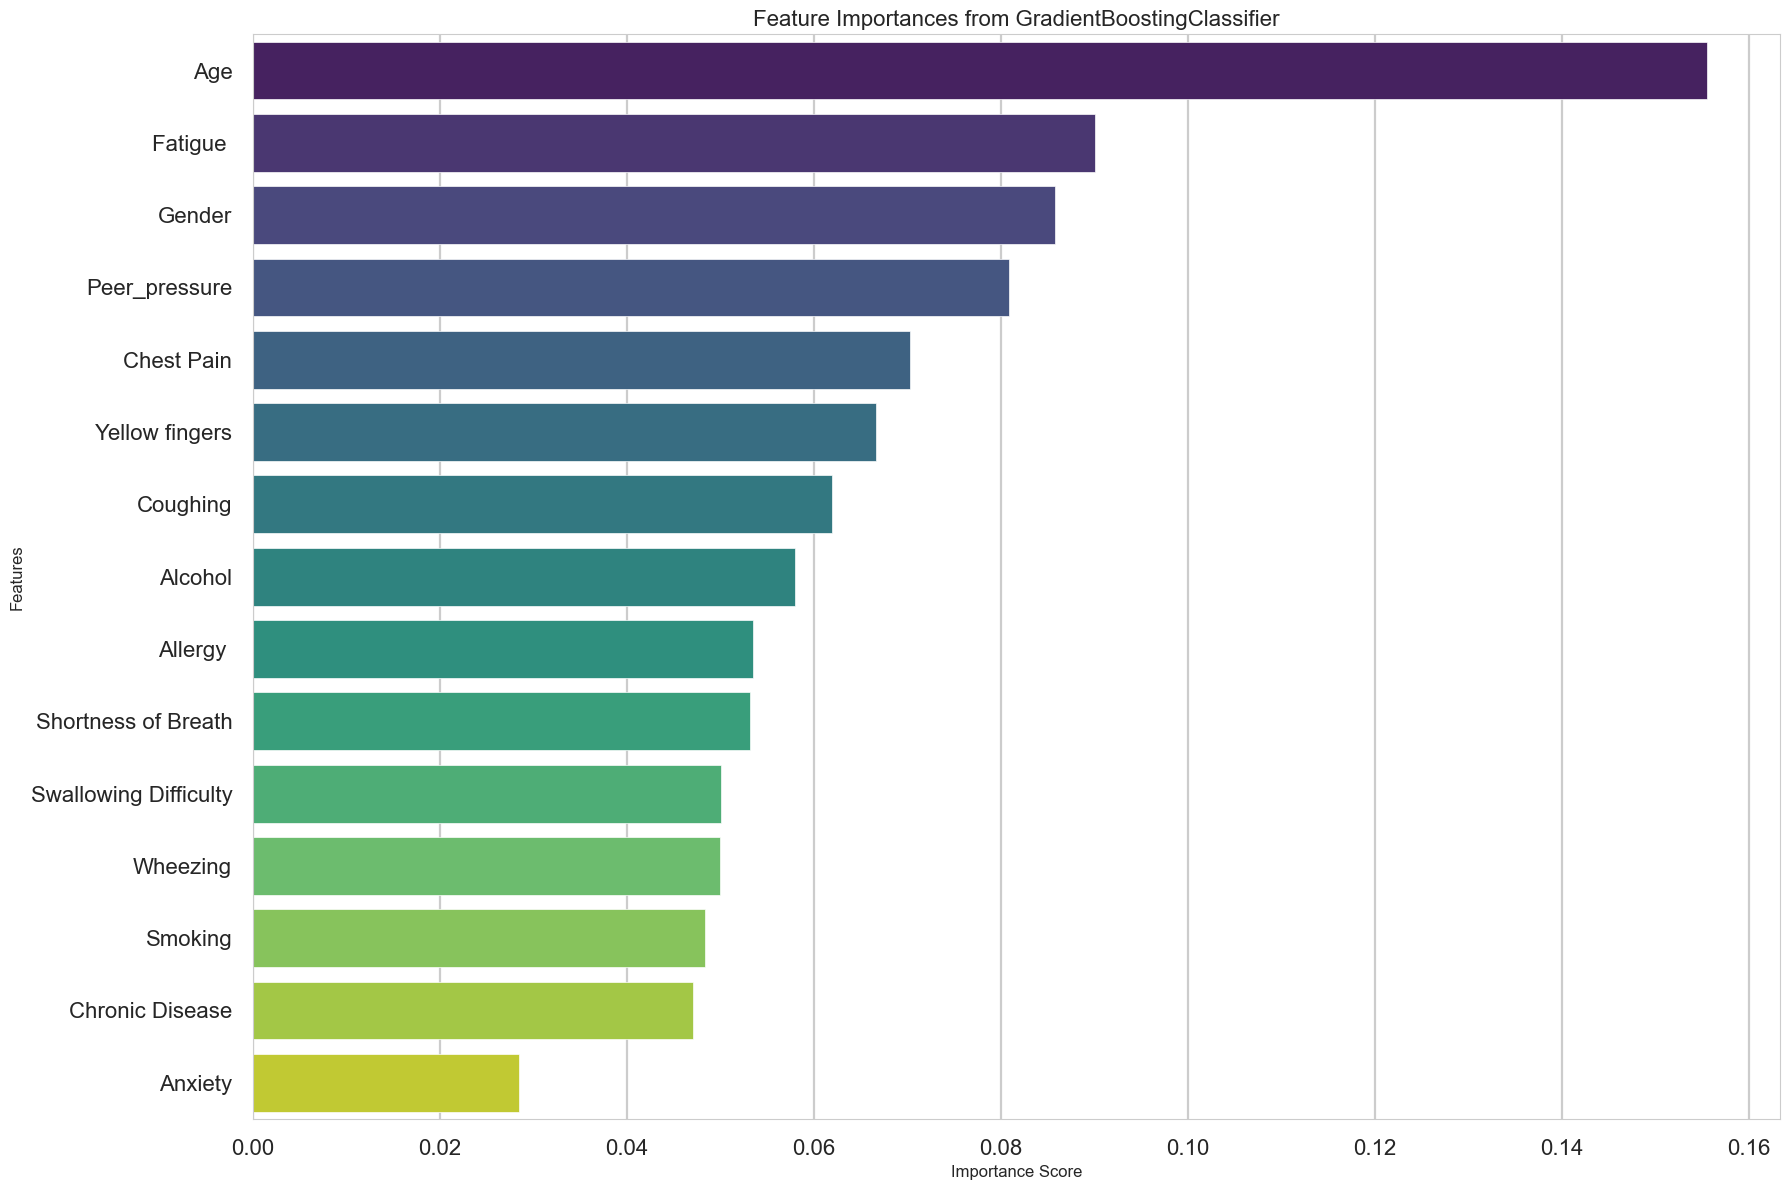

Displayed 'feature_importances' plot.

Most Important Features according to the best model:
                  Feature  Importance
1                     Age    0.155577
7                Fatigue     0.090113
0                  Gender    0.085760
5           Peer_pressure    0.080924
14             Chest Pain    0.070293
3          Yellow fingers    0.066683
11               Coughing    0.061957
10                Alcohol    0.058004
8                Allergy     0.053523
12    Shortness of Breath    0.053204
13  Swallowing Difficulty    0.050054
9                Wheezing    0.049990


In [36]:
print("\n--- Feature Importance Analysis ---")
feature_importance_df = pd.DataFrame()
if best_model:
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(18, 12))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
    plt.title(f'Feature Importances from {type(best_model).__name__}', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()
    print("Displayed 'feature_importances' plot.")
    print("\nMost Important Features according to the best model:")
    print(feature_importance_df.head(12))
else:
    print("No model was trained successfully to show feature importances.")

In [37]:
# Now for the final part! We'll use our best model to make a prediction based
# on answers from the user.

print("\n--- Live Lung Cancer Risk Prediction ---")

def get_live_input(full_dataset, top_features_df):
    """Gathers user input for the most important features with validation."""
    print("\nPlease answer the following questions for a risk assessment.")
    user_data = {}
    top_features = top_features_df['Feature'].head(12).tolist()
    
    questions = {
        'Age': ("What is your current age? ", (1, 120)),
        'Gender': ("What is your gender? (Enter 1 for Male, 2 for Female): ", (1, 2)),
        'Air Pollution': ("On a scale of 1-10, how would you rate your daily exposure to Air Pollution? ", (1, 10)),
        'Alcohol use': ("On a scale of 1-8, how would you rate your alcohol consumption? ", (1, 8)),
        'Dust Allergy': ("How severe is your dust allergy? (Rate 1-8): ", (1, 8)),
        'OccuPational Hazards': ("How would you rate your exposure to occupational hazards? (Rate 1-8): ", (1, 8)),
        'Genetic Risk': ("How would you rate your genetic risk for cancer? (Rate 1-7): ", (1, 7)),
        'chronic Lung Disease': ("How severe is your chronic lung disease? (Rate 1-7): ", (1, 7)),
        'Balanced Diet': ("How would you rate the quality of your diet? (Rate 1-7): ", (1, 7)),
        'Obesity': ("How would you rate your level of obesity? (Rate 1-7): ", (1, 7)),
        'Smoking': ("How would you rate your smoking habits? (Rate 1-8): ", (1, 8)),
        'Passive Smoker': ("How would you rate your exposure as a passive smoker? (Rate 1-8): ", (1, 8)),
        'Chest Pain': ("How severe is your chest pain? (Rate 1-9): ", (1, 9)),
        'Coughing of Blood': ("How severe is your coughing of blood? (Rate 1-9): ", (1, 9)),
        'Fatigue': ("How would you rate your level of fatigue? (Rate 1-9): ", (1, 9)),
        'Weight Loss': ("How would you rate your unexplained weight loss? (Rate 1-8): ", (1, 8)),
        'Shortness of Breath': ("How severe is your shortness of breath? (Rate 1-9): ", (1, 9)),
        'Wheezing': ("How severe is your wheezing? (Rate 1-8): ", (1, 8)),
        'Swallowing Difficulty': ("How severe is your difficulty in swallowing? (Rate 1-8): ", (1, 8)),
        'Clubbing of Finger Nails': ("How severe is the clubbing of your finger nails? (Rate 1-9): ", (1, 9)),
        'Frequent Cold': ("How frequent are your colds? (Rate 1-7): ", (1, 7)),
        'Dry Cough': ("How severe is your dry cough? (Rate 1-7): ", (1, 7)),
        'Snoring': ("How severe is your snoring? (Rate 1-7): ", (1, 7))
    }
    
    print("\n--- Please answer the most important questions ---")
    for feature in top_features:
        while True:
            try:
                prompt, bounds = questions.get(feature, (f"Enter value for {feature}: ", (None, None)))
                min_val, max_val = bounds
                val = int(input(prompt))
                if min_val is not None and max_val is not None and not (min_val <= val <= max_val):
                    print(f"Invalid input. Please enter a number between {min_val} and {max_val}.")
                    continue
                user_data[feature] = val
                break
            except ValueError:
                print("Invalid input. Please enter a whole number.")

    all_features = full_dataset.drop(['Level', 'Level_encoded'], axis=1).columns
    for feature in all_features:
        if feature not in user_data:
            user_data[feature] = round(full_dataset[feature].mean())
    
    return user_data

try:
    if not feature_importance_df.empty:
        live_input = get_live_input(df, feature_importance_df)
        input_df = pd.DataFrame([live_input])
        input_df = input_df[X.columns]

        if best_model is not None:
            prediction_encoded = best_model.predict(input_df)
            prediction_proba = best_model.predict_proba(input_df)

            prediction_label = le.inverse_transform(prediction_encoded)
            confidence = prediction_proba[0][prediction_encoded[0]] * 100

            print("\n--- Prediction Result ---")
            print(f"The model predicts a '{prediction_label[0]}' risk level for lung cancer.")
            print(f"Confidence: {confidence:.2f}%")

            print("\n*** IMPORTANT DISCLAIMER ***")
            print("This prediction is based on a machine learning model and is for educational purposes only.")
            print("It is NOT a substitute for professional medical advice. Please consult a doctor for an accurate diagnosis.")
        else:
            print("No model available for prediction.")
    else:
        print("\nCould not run live prediction as feature importance was not determined.")

except (KeyboardInterrupt, EOFError):
    print("\n\nPrediction cancelled by user.")


print("\n--- Analysis Complete ---")


--- Live Lung Cancer Risk Prediction ---

Please answer the following questions for a risk assessment.

--- Please answer the most important questions ---

--- Prediction Result ---
The model predicts a 'High' risk level for lung cancer.
Confidence: 49.45%

*** IMPORTANT DISCLAIMER ***
This prediction is based on a machine learning model and is for educational purposes only.
It is NOT a substitute for professional medical advice. Please consult a doctor for an accurate diagnosis.

--- Analysis Complete ---


In [38]:
import joblib
import os

# Define the output directory relative to the notebook's location
# The notebook is in 'project/models', so we save directly here.
output_dir = '.' 

# Ensure the directory exists (it should, but this is good practice)
os.makedirs(output_dir, exist_ok=True)

# Define the full paths for the files
model_path = os.path.join(output_dir, 'lung_cancer_model.pkl')
encoder_path = os.path.join(output_dir, 'lung_cancer_label_encoder.pkl')

# Save the model and encoder
joblib.dump(best_model, model_path)
joblib.dump(le, encoder_path)

print(f"✅ Model exported to: {os.path.abspath(model_path)}")
print(f"✅ Encoder exported to: {os.path.abspath(encoder_path)}")

✅ Model exported to: d:\Engineering\Hackathon Projects\AI_Health_prediction\project\models\lung_cancer_model.pkl
✅ Encoder exported to: d:\Engineering\Hackathon Projects\AI_Health_prediction\project\models\lung_cancer_label_encoder.pkl
